# Q2-7.手動ライト

## 問題
**Q2-7.ボタンAを押すとテストヘッドのpwmout0のLEDの明るさを10上げて、ボタンBを押すと10下げる手動ライトを作りましょう。**  
pwmout0にセットする値は0-250の範囲内に収まるようにしてください。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

### ここから問題  ###

"""(コードを記述)"""

### ここまで  ###

### 動作イメージ

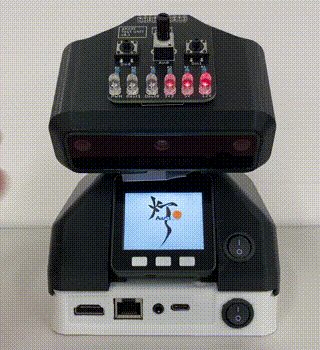

In [1]:
from IPython.display import Image
Image('image/q2-7.gif')

### ヒント

**ボタン操作はQ2-1、pwmoutはq2-4を参考にしましょう。**

[Q2-1](q2-1_button.ipynb)と同じ方法でボタンA, ボタンBの状態が取得できます。  
if文で、ボタンAが押されている場合の処理、ボタンBが押されている場合の処理を書いていきましょう。

pwmoutの出力値の変数を初期値0で最初に作っておいて、ボタンAが押されたら+10、ボタンBが押されたら-10、PWM出力をセットして少しsleep、というのが処理の流れです。  
この処理をwhile文でループさせましょう。

PWM出力には[Q2-4](q2-4_pwmout.ipynb)と同じく、set_pwmout()を使います。

１ループの最後にtime.sleep()を入れないと処理が間に合いませんが、sleep時間が長すぎると動きが遅くなってしまいます。  
sleep時間を色々変えながら、使いやすい値を決定していきましょう。

完成したら実行してみましょう。  
ボタンAとボタンBで、テストヘッドのpwmout0のLEDの明るさが変更できれば成功です。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする
import time

### ここから問題  ###
# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

# pwmout0の明るさの変数を初期値0で作成。
pwmout0_val = 0

# セルの実行を停止するまでループし続ける。
while(True):
    m5_data = m5.get()
    # ボタンAが押されていて、かつpwmout0_valが240以下の場合、pwmout0を+10。
    if(m5_data["button_a"] and pwmout0_val <= 240):
        pwmout0_val += 10
    # ボタンBが押されていて、かつpwmout0_valが10以上の場合、pwmout0を-10。
    if(m5_data["button_b"] and pwmout0_val >= 10):
        pwmout0_val -= 10
    # pwmout0の値をコマンドラインに出力。
    print("今の明るさは" + str(pwmout0_val) + "です。")
    # pwmout0を指令
    m5.set_pwmout(pin_id=0, value=pwmout0_val)
    # 0.1秒停止処理を入れる。ここは各自調整！
    time.sleep(0.1)
### ここまで  ###

#### 4-7行目:
```python
# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする
import time
```
最初に必要なモジュールをインポートします。  
1つ目はM5と通信するためのAkariClient。  
2つ目はsleepを使うために必要なtimeです。

#### 11-12行目:
```python
akari = AkariClient()
m5 = akari.m5stack
```
AKARIのライブラリであるAkariClientを使用するには、最初にこのインスタンスの作成が必須となります。  
ここではそのインスタンスにakariという名前を付けています。  
また、m5の制御を行うには、このakariの中のm5stackのインスタンスも取得する必要があります。


#### 15行目:
```python
pwmout0_val = 0
```
pwm出力値として使う変数をここで作成しておきます。  
while文の中に書いてしまうと、毎回ループのために0が与えられてしまうので、while文の前に書きます。

#### 18行目:
```python
while(True):
```
3秒に１回動作するコードなので、while()でループさせます。  
条件式はTrueなので、終了するまでループし続けます。

#### 19行目:
```python
m5_data = m5.get()
```

12行目で _m5_ という名前のAkariClient().m5stackのインスタンスを作成しています。  
この場合、AkariClient().m5stackに含まれる関数は _m5.関数名_ という形で呼び出します。

ここではget()関数を使ってm5の情報を取得しています。

#### 21-22行目:
```python
if(m5_data["button_a"] and pwmout0_val <= 240):
    pwmout0_val += 10
```
ボタンAの出力はm5_data["button_a"]に格納されています。  
ボタンAが True で、かつpwmout0_valが240以下の時のみ、32行目で作成した変数であるpwmout0_valを+10します。  
こうすることで、pwmout0_valが250を超えないようにします。

#### 24-25行目:
```python
if(m5_data['button_b'] and pwmout0_val >= 10):
    pwmout0_val -= 10
```
ボタンBの出力はm5_data['button_b']に格納されています。  
同様にボタンBが True かつpwmout0_valが10以上の時のみ、pwmout0_valを-10します。  
こうすることで、pwmout0_valが0を下回らないようにします。

#### 27行目:
```python
print("今の明るさは" + str(pwmout0_val) + "です。")
```
pwmout0_valをコマンドラインに出力しておきます。

#### 29行目:
```python
m5.set_pwmout(pin_id=0, value=pwmout0_val)
```
ボタンによって更新されたpwmout0_valを出力値として、set_pwmout()でpwmout0を出力します。

#### 31行目:
```python
time.sleep(0.1)
```
0.1秒間停止させる処理をします。  
ここの値は各自調整し、ループ速度と処理のレスポンスが最適になるようにしましょう。

## 最後に
これでQ2-7は終了です。次は、ディスプレイカラーの制御を学習してみましょう。

[次の問題へ](q3-1_display_color.ipynb)